In [33]:
import pandas as pd
import numpy as np

In [34]:
df=pd.read_csv(r'C:\MachineLearning\dataset\weather-stations.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Stn_Name  1341 non-null   object 
 1   Lat       1341 non-null   float64
 2   Long      1341 non-null   float64
 3   Prov      1341 non-null   object 
 4   Tm        1256 non-null   float64
 5   DwTm      1256 non-null   float64
 6   D         357 non-null    float64
 7   Tx        1260 non-null   float64
 8   DwTx      1260 non-null   float64
 9   Tn        1260 non-null   float64
 10  DwTn      1260 non-null   float64
 11  S         586 non-null    float64
 12  DwS       586 non-null    float64
 13  S%N       198 non-null    float64
 14  P         1227 non-null   float64
 15  DwP       1227 non-null   float64
 16  P%N       209 non-null    float64
 17  S_G       798 non-null    float64
 18  Pd        1227 non-null   float64
 19  BS        0 non-null      float64
 20  DwBS      0 non-null      floa

In [35]:
df.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


In [36]:
df.shape

(1341, 25)

In [37]:
df=df.dropna(how='all',axis=1)
df=df.dropna(how='all',axis=0)
name=df.pop('Stn_Name')
df=df.drop(['Stn_No'],1)
df.shape

(1341, 20)

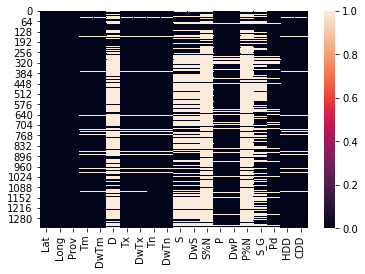

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())

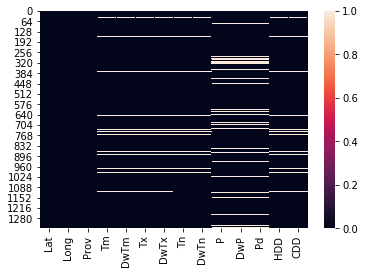

In [39]:
df=df.drop(['S%N','P%N','DwS','S','S_G','D'],1)
sns.heatmap(df.isnull())

In [40]:
df=df.fillna(method='ffill')

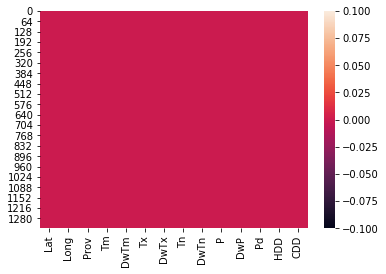

In [41]:
sns.heatmap(df.isnull())

In [42]:
lat=df.pop('Lat')
long=df.pop('Long')

In [159]:
from pyclustertend import hopkins
test=[]
for i in range(2,300):
    test.append(hopkins(df,sampling_size=i))
test.index(max(test))

0

In [158]:
test=[]
for i in range(2,300):
    test.append(hopkins(df[['Tm','Tn']],sampling_size=i))
test.index(max(test)),max(test)

(14, 0.07204087644943753)

In [43]:
import sklearn
help(sklearn.cluster.DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. This is the most
 |      important DBSCAN parameter to choose appropriately for your data set
 |      and distance function.
 |  
 |  min_sample

In [44]:
df.dtypes

Prov     object
Tm      float64
DwTm    float64
Tx      float64
DwTx    float64
Tn      float64
DwTn    float64
P       float64
DwP     float64
Pd      float64
HDD     float64
CDD     float64
dtype: object

In [45]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
le=LabelEncoder()
df['Prov']=le.fit_transform(df['Prov'])
mms=MinMaxScaler()
x=mms.fit_transform(df)

In [46]:
x

array([[0.08333333, 0.9707113 , 0.        , ..., 0.42857143, 0.16515293,
        0.        ],
       [0.08333333, 0.94560669, 0.        , ..., 0.42857143, 0.18765861,
        0.        ],
       [0.08333333, 0.94142259, 0.48148148, ..., 0.39285714, 0.09489782,
        0.        ],
       ...,
       [0.33333333, 0.28870293, 0.07407407, ..., 0.14285714, 0.71804461,
        0.        ],
       [0.33333333, 0.32217573, 0.07407407, ..., 0.14285714, 0.69053025,
        0.        ],
       [0.33333333, 0.21966527, 0.        , ..., 0.07142857, 0.8373848 ,
        0.        ]])

In [122]:
from sklearn.cluster import DBSCAN
for i in range(2,1000):
    dbs=DBSCAN(min_samples=i)
    result=dbs.fit(x)
    df['result']=result.labels_
    print(i,"\n",df['result'].value_counts())

2 
  0    1328
-1       8
 2       3
 1       2
Name: result, dtype: int64
3 
  0    1328
-1      10
 1       3
Name: result, dtype: int64
4 
  0    1328
-1      13
Name: result, dtype: int64
5 
  0    1327
-1      14
Name: result, dtype: int64
6 
  0    1327
-1      14
Name: result, dtype: int64
7 
  0    1325
-1      16
Name: result, dtype: int64
8 
  0    1323
-1      18
Name: result, dtype: int64
9 
  0    1323
-1      18
Name: result, dtype: int64
10 
  0    1323
-1      18
Name: result, dtype: int64
11 
  0    1323
-1      18
Name: result, dtype: int64
12 
  0    1323
-1      18
Name: result, dtype: int64
13 
  0    1323
-1      18
Name: result, dtype: int64
14 
  0    1322
-1      19
Name: result, dtype: int64
15 
  0    1321
-1      20
Name: result, dtype: int64
16 
  0    1319
-1      22
Name: result, dtype: int64
17 
  0    1319
-1      22
Name: result, dtype: int64
18 
  0    1319
-1      22
Name: result, dtype: int64
19 
  0    1319
-1      22
Name: result, dtype: int64
20 

153 
  0    1250
-1      91
Name: result, dtype: int64
154 
  0    1250
-1      91
Name: result, dtype: int64
155 
  0    1250
-1      91
Name: result, dtype: int64
156 
  0    1250
-1      91
Name: result, dtype: int64
157 
  0    1250
-1      91
Name: result, dtype: int64
158 
  0    1250
-1      91
Name: result, dtype: int64
159 
  0    1250
-1      91
Name: result, dtype: int64
160 
  0    1250
-1      91
Name: result, dtype: int64
161 
  0    1250
-1      91
Name: result, dtype: int64
162 
  0    1250
-1      91
Name: result, dtype: int64
163 
  0    1250
-1      91
Name: result, dtype: int64
164 
  0    1248
-1      93
Name: result, dtype: int64
165 
  0    1248
-1      93
Name: result, dtype: int64
166 
  0    1248
-1      93
Name: result, dtype: int64
167 
  0    1245
-1      96
Name: result, dtype: int64
168 
  0    1245
-1      96
Name: result, dtype: int64
169 
  0    1245
-1      96
Name: result, dtype: int64
170 
  0    1245
-1      96
Name: result, dtype: int64
171 
  0  

302 
  0    1204
-1     137
Name: result, dtype: int64
303 
  0    1204
-1     137
Name: result, dtype: int64
304 
  0    1204
-1     137
Name: result, dtype: int64
305 
  0    1204
-1     137
Name: result, dtype: int64
306 
  0    1204
-1     137
Name: result, dtype: int64
307 
  0    1204
-1     137
Name: result, dtype: int64
308 
  0    1204
-1     137
Name: result, dtype: int64
309 
  0    1204
-1     137
Name: result, dtype: int64
310 
  0    1204
-1     137
Name: result, dtype: int64
311 
  0    1204
-1     137
Name: result, dtype: int64
312 
  0    1204
-1     137
Name: result, dtype: int64
313 
  0    1203
-1     138
Name: result, dtype: int64
314 
  0    1203
-1     138
Name: result, dtype: int64
315 
  0    1203
-1     138
Name: result, dtype: int64
316 
  0    1203
-1     138
Name: result, dtype: int64
317 
  0    1203
-1     138
Name: result, dtype: int64
318 
  0    1203
-1     138
Name: result, dtype: int64
319 
  0    1203
-1     138
Name: result, dtype: int64
320 
  0  

453 
  0    944
-1    397
Name: result, dtype: int64
454 
  0    914
-1    427
Name: result, dtype: int64
455 
  0    914
-1    427
Name: result, dtype: int64
456 
  0    913
-1    428
Name: result, dtype: int64
457 
  0    909
-1    432
Name: result, dtype: int64
458 
  0    905
-1    436
Name: result, dtype: int64
459 
  0    895
-1    446
Name: result, dtype: int64
460 
  0    895
-1    446
Name: result, dtype: int64
461 
  0    893
-1    448
Name: result, dtype: int64
462 
  0    892
-1    449
Name: result, dtype: int64
463 
  0    892
-1    449
Name: result, dtype: int64
464 
  0    892
-1    449
Name: result, dtype: int64
465 
  0    765
-1    576
Name: result, dtype: int64
466 
  0    763
-1    578
Name: result, dtype: int64
467 
  0    763
-1    578
Name: result, dtype: int64
468 
  0    763
-1    578
Name: result, dtype: int64
469 
  0    763
-1    578
Name: result, dtype: int64
470 
  0    763
-1    578
Name: result, dtype: int64
471 
  0    763
-1    578
Name: result, dtype:

634 
 -1    1341
Name: result, dtype: int64
635 
 -1    1341
Name: result, dtype: int64
636 
 -1    1341
Name: result, dtype: int64
637 
 -1    1341
Name: result, dtype: int64
638 
 -1    1341
Name: result, dtype: int64
639 
 -1    1341
Name: result, dtype: int64
640 
 -1    1341
Name: result, dtype: int64
641 
 -1    1341
Name: result, dtype: int64
642 
 -1    1341
Name: result, dtype: int64
643 
 -1    1341
Name: result, dtype: int64
644 
 -1    1341
Name: result, dtype: int64
645 
 -1    1341
Name: result, dtype: int64
646 
 -1    1341
Name: result, dtype: int64
647 
 -1    1341
Name: result, dtype: int64
648 
 -1    1341
Name: result, dtype: int64
649 
 -1    1341
Name: result, dtype: int64
650 
 -1    1341
Name: result, dtype: int64
651 
 -1    1341
Name: result, dtype: int64
652 
 -1    1341
Name: result, dtype: int64
653 
 -1    1341
Name: result, dtype: int64
654 
 -1    1341
Name: result, dtype: int64
655 
 -1    1341
Name: result, dtype: int64
656 
 -1    1341
Name: result, d

822 
 -1    1341
Name: result, dtype: int64
823 
 -1    1341
Name: result, dtype: int64
824 
 -1    1341
Name: result, dtype: int64
825 
 -1    1341
Name: result, dtype: int64
826 
 -1    1341
Name: result, dtype: int64
827 
 -1    1341
Name: result, dtype: int64
828 
 -1    1341
Name: result, dtype: int64
829 
 -1    1341
Name: result, dtype: int64
830 
 -1    1341
Name: result, dtype: int64
831 
 -1    1341
Name: result, dtype: int64
832 
 -1    1341
Name: result, dtype: int64
833 
 -1    1341
Name: result, dtype: int64
834 
 -1    1341
Name: result, dtype: int64
835 
 -1    1341
Name: result, dtype: int64
836 
 -1    1341
Name: result, dtype: int64
837 
 -1    1341
Name: result, dtype: int64
838 
 -1    1341
Name: result, dtype: int64
839 
 -1    1341
Name: result, dtype: int64
840 
 -1    1341
Name: result, dtype: int64
841 
 -1    1341
Name: result, dtype: int64
842 
 -1    1341
Name: result, dtype: int64
843 
 -1    1341
Name: result, dtype: int64
844 
 -1    1341
Name: result, d

In [124]:
dbs=DBSCAN(min_samples=477)
result=dbs.fit(x)
df['result']=result.labels_
df['Lat']=lat
df['Long']=long

In [125]:
df.head()

,Prov,Tm,DwTm,Tx,DwTx,Tn,DwTn,P,DwP,Pd,HDD,CDD,Lat,Long,result
0,1,8.2,0.0,13.5,0.0,1.0,0.0,178.8,0.0,12.0,273.3,0.0,48.935,-123.742,-1
1,1,7.0,0.0,15.0,0.0,-3.0,0.0,258.6,0.0,12.0,307.0,0.0,48.824,-124.133,-1
2,1,6.8,13.0,16.0,9.0,-2.5,9.0,264.6,9.0,11.0,168.1,0.0,48.829,-124.052,-1
3,1,6.8,13.0,12.5,0.0,-2.5,9.0,264.6,9.0,11.0,168.1,0.0,48.425,-123.226,-1
4,1,7.7,2.0,14.5,2.0,-1.0,2.0,168.4,2.0,11.0,267.7,0.0,48.735,-123.728,-1


In [126]:
df.to_csv("DBSCAN.csv")

In [127]:
df['result'].value_counts()

-1    860
 0    481
Name: result, dtype: int64

In [128]:
df=df.drop(['result','Lat','Long'],1)

In [130]:
from sklearn.metrics import silhouette_score
silhouette_score(df,dbs.labels_)

0.08660441073808485

In [131]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=7).fit(df.values.reshape(-1,1))

In [132]:
km.labels_

array([0, 0, 0, ..., 0, 4, 0])

In [133]:
silhouette_score(df.values.reshape(-1,1),km.labels_)

0.8529625513943339

In [144]:
score=[]
for i in range(2,20):
    km=KMeans(n_clusters=i).fit(df.values.reshape(-1,1))
    score.append(silhouette_score(df.values.reshape(-1,1),km.labels_))
score.index(min(score))+2,min(score)

(17, 0.6626776420590754)

In [145]:
score=[]
for i in range(2,20):
    km=KMeans(n_clusters=i).fit(df['Tm'].values.reshape(-1,1))
    score.append(silhouette_score(df['Tm'].values.reshape(-1,1),km.labels_))
score.index(min(score))+2,min(score)

(17, 0.5397242143963643)

In [149]:
from sklearn.metrics import davies_bouldin_score
km=KMeans(n_clusters=17).fit(df.values.reshape(-1,1))
davies_bouldin_score(df.values.reshape(-1,1),km.labels_)

0.4765706567558285

In [209]:
help(sklearn.cluster.mean_shift)

Help on function mean_shift in module sklearn.cluster._mean_shift:

mean_shift(X, bandwidth=None, seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=True, max_iter=300, n_jobs=None)
    Perform mean shift clustering of data using a flat kernel.
    
    Read more in the :ref:`User Guide <mean_shift>`.
    
    Parameters
    ----------
    
    X : array-like of shape (n_samples, n_features)
        Input data.
    
    bandwidth : float, optional
        Kernel bandwidth.
    
        If bandwidth is not given, it is determined using a heuristic based on
        the median of all pairwise distances. This will take quadratic time in
        the number of samples. The sklearn.cluster.estimate_bandwidth function
        can be used to do this more efficiently.
    
    seeds : array-like of shape (n_seeds, n_features) or None
        Point used as initial kernel locations. If None and bin_seeding=False,
        each data point is used as a seed. If None and bin_seeding=True,
    

In [204]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=4)
agg.fit(df.values.reshape(-1,1))

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [205]:
agg.labels_

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [206]:
silhouette_score(df.values.reshape(-1,1),agg.labels_)

0.907838497748493

In [219]:
from sklearn.cluster import mean_shift
labels=mean_shift(df.values.reshape(-1,1),)

In [221]:
labels

(array([[3.65329374e-01],
        [8.84524752e+02],
        [2.10646948e+02],
        [6.55613855e+02],
        [3.89288793e+02],
        [4.90933654e+02],
        [1.37012326e+03]]),
 array([0, 0, 0, ..., 0, 6, 0], dtype=int64))

In [216]:
silhouette_score(df.values.reshape(-1,1),labels)

0.880804345293161